# Water Report & News Classification using BERT Method

In [1]:
#!pip install torchvision

In [2]:
#!pip install transformers

In [3]:
#conda create -n env_pytorch python=3.6

In [27]:
#%%time
#!pip install bert-extractive-summarizer

In [28]:
#%%time
#!pip install spacy==2.0.12

Wall time: 52 s


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\patil\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\patil\\AppData\\Local\\Temp\\pip-install-jr3r_nnw\\spacy\\setup.py'"'"'; __file__='"'"'C:\\Users\\patil\\AppData\\Local\\Temp\\pip-install-jr3r_nnw\\spacy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\patil\AppData\Local\Temp\pip-wheel-edslbmd6'
       cwd: C:\Users\patil\AppData\Local\Temp\pip-install-jr3r_nnw\spacy\
  Complete output (632 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\spacy
  copying spacy\about.py -> build\lib.win-amd64-3.8\spacy
  copying spacy\compat.py -> build\lib.win-amd64-3.8\spacy
  copying spacy\errors.py -> build\lib.win-amd64-3.8\spac

  Running setup.py clean for spacy
  Running setup.py clean for murmurhash
  Running setup.py clean for cymem
  Running setup.py clean for preshed
  Running setup.py clean for thinc
  Created wheel for dill: filename=dill-0.2.9-py3-none-any.whl size=77472 sha256=d08b542bb512b3b14a637fde13ec640f5a754c49b291bfe49d3f26d764a0de6b
  Stored in directory: c:\users\patil\appdata\local\pip\cache\wheels\da\03\f6\41ff217c2d88b1446b2d593d5b7433b9e823f1ee52e798e4f2
  Running setup.py clean for regex
  Created wheel for msgpack: filename=msgpack-0.6.2-cp38-cp38-win_amd64.whl size=14590 sha256=eac5b5c1413eb42fb7b65cad1505c9193f1678bfab638f4330d74415860d9b45
  Stored in directory: c:\users\patil\appdata\local\pip\cache\wheels\5d\f2\04\0d19c10080b996bef17c908a6243e6e65d8da1a4094a3f604d
  Running setup.py clean for cytoolz
  Created wheel for wrapt: filename=wrapt-1.10.11-py3-none-any.whl size=20743 sha256=ce28c374bf43b09b491fe55e29a1384e9348529b0e5b5d50738f19c1913df643
  Stored in directory: c:\users\p

  copying spacy\lang\es\lemmatizer.py -> build\lib.win-amd64-3.8\spacy\lang\es
  copying spacy\lang\es\stop_words.py -> build\lib.win-amd64-3.8\spacy\lang\es
  copying spacy\lang\es\syntax_iterators.py -> build\lib.win-amd64-3.8\spacy\lang\es
  copying spacy\lang\es\tag_map.py -> build\lib.win-amd64-3.8\spacy\lang\es
  copying spacy\lang\es\tokenizer_exceptions.py -> build\lib.win-amd64-3.8\spacy\lang\es
  copying spacy\lang\es\__init__.py -> build\lib.win-amd64-3.8\spacy\lang\es
  creating build\lib.win-amd64-3.8\spacy\lang\fa
  copying spacy\lang\fa\examples.py -> build\lib.win-amd64-3.8\spacy\lang\fa
  copying spacy\lang\fa\stop_words.py -> build\lib.win-amd64-3.8\spacy\lang\fa
  copying spacy\lang\fa\__init__.py -> build\lib.win-amd64-3.8\spacy\lang\fa
  creating build\lib.win-amd64-3.8\spacy\lang\fi
  copying spacy\lang\fi\examples.py -> build\lib.win-amd64-3.8\spacy\lang\fi
  copying spacy\lang\fi\stop_words.py -> build\lib.win-amd64-3.8\spacy\lang\fi
  copying spacy\lang\fi\toke

  copying spacy\syntax\nn_parser.pyx -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\nonproj.pyx -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\stateclass.pyx -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\transition_system.pyx -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\_beam_utils.pyx -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\_state.pyx -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\arc_eager.pxd -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\ner.pxd -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\nn_parser.pxd -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\nonproj.pxd -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\stateclass.pxd -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\transition_system.pxd -> build\lib.win-amd64-3.8\spacy\syntax
  copying spacy\syntax\_state.pxd -> build\lib.win-amd64-3.8\spacy\sy

### 1. Import Libraries and Dataset loading

In [37]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import torch
import transformers as ppb
import summarizer

import warnings
warnings.filterwarnings('ignore')

In [30]:
Water_df = pd.read_csv('Water_Report&News.csv', header=0)


convert_dict = {'text': str, 
                'env_problems': int,
                'pollution': int, 
                'treatment': int,
                'climate': int,
                'biomonitoring': int} 
  
df = Water_df.astype(convert_dict)
df

,text,env_problems,pollution,treatment,climate,biomonitoring
0,In the Southern Bug basin wastewater is discha...,1,1,0,0,0
1,This amount is distributed as follows: urban a...,1,1,0,0,0
2,Despite the similar volumes of discharged wast...,1,1,0,0,0
3,They bring 84% of organic pollution 86% of pho...,1,1,0,0,0
4,The input of the industry is between 7–21% and...,1,1,0,0,0
...,...,...,...,...,...,...
95,Chemical composition of water bodies shall com...,0,0,0,0,0
96,According to the Directive provisions water bo...,0,0,0,0,0
97,Besides in the field of data processing during...,0,0,0,0,0
98,Use of these values was offered by the Monitor...,0,0,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           100 non-null    object
 1   env_problems   100 non-null    int32 
 2   pollution      100 non-null    int32 
 3   treatment      100 non-null    int32 
 4   climate        100 non-null    int32 
 5   biomonitoring  100 non-null    int32 
dtypes: int32(5), object(1)
memory usage: 2.9+ KB


In [32]:
df['text'].str.len().max()

355

In [33]:
# Creation the list with new long block
max_length = 400  # minimum characters in each block
i = 0
bodies = []
while i < len(df):
    body = ""
    body_empty = True
    while (len(body) < max_length) and (i < len(df)):
        if body_empty:
            body = df.loc[i,'text']
            body_empty = False
        else: body += " " + df.loc[i,'text']
        i += 1
    bodies.append(body)
    print("Length of blocks =", len(body))
print(f"\nNumber of text blocks = {len(bodies)}\n")
print("Text blocks:\n", bodies)

Length of blocks = 410
Length of blocks = 553
Length of blocks = 525
Length of blocks = 447
Length of blocks = 623
Length of blocks = 416
Length of blocks = 442
Length of blocks = 428
Length of blocks = 489
Length of blocks = 416
Length of blocks = 584
Length of blocks = 442
Length of blocks = 452
Length of blocks = 532
Length of blocks = 406
Length of blocks = 408
Length of blocks = 410
Length of blocks = 667
Length of blocks = 517
Length of blocks = 402
Length of blocks = 497
Length of blocks = 439
Length of blocks = 502
Length of blocks = 512
Length of blocks = 491
Length of blocks = 516
Length of blocks = 406
Length of blocks = 569
Length of blocks = 435
Length of blocks = 496
Length of blocks = 426
Length of blocks = 400

Number of text blocks = 32

Text blocks:
 ['In the Southern Bug basin wastewater is discharged from 341 organized sources (Map 5). In 2011 (reference year) 211 mln. m3 was discharged in total. This amount is distributed as follows: urban and rural housing wastewa

In [34]:
min_length_text = 40

### 2. Data Preparining and Modelling

In [18]:
# For pre-trained DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-multilingual-cased')

# Other models: https://huggingface.co/transformers/pretrained_models.html

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
# Tokenization the sentences - break them up into word and subwords in the format BERT is comfortable with
tokenized = df['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
np.array(padded).shape

(100, 80)

In [20]:
# Creation variable to ignore (mask) the data padding
attention_mask = np.where(padded != 0, 1, 0)
print(attention_mask.shape)
attention_mask

(100, 80)


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [21]:
# Modeling
input_ids = torch.tensor(padded).to(torch.int64)
attention_mask = torch.tensor(attention_mask).to(torch.int64)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [22]:
# Last hidden states
features = last_hidden_states[0][:,0,:].numpy()

### 3. Text Classification and Prediction

In [40]:
def target_prediction(df, features, target, test_size=0.2):
    # Text classification model and prediction for given feature "target" (with labels) in df
    
    # Target
    labels = df[target]
    
    # EDA
    print()
    # Extracting the number of examples of each class
    Relevant_len = df[df[target] == 1].shape[0]
    Not_len = df[df[target] == 0].shape[0]
    # Draw bar plot
    plt.rcParams['figure.figsize'] = (7, 5)
    plt.bar(10, Relevant_len, 3, label="Relevant", color='green')
    plt.bar(15, Not_len, 3, label="Not", color='red')
    plt.legend(loc='upper center')
    plt.ylabel('Number of examples')
    plt.title('Propertion of examples for ' + target)
    plt.show()
    
    # Train, test split 
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=test_size)
    
    # Train a simple model
    print(f'Classification for {col}:')
    parameters = {'C': np.linspace(0.0001, 100, 20)}
    model = GridSearchCV(LogisticRegression(), parameters)
    model.fit(train_features, train_labels)

    print('best parameters: ', model.best_params_)
    print('best scores: ', model.best_score_)
    
    # Test prediction
    test_pred = model.predict(test_features)
    print('Score of the test prediction -', accuracy_score(test_labels, test_pred),'\n\n')
    
    

In [41]:
# List of the target features in df
cols = df.columns.tolist()[1:]
print('Target columns:', cols)

Target columns: ['env_problems', 'pollution', 'treatment', 'climate', 'biomonitoring']


Solving NLP Classification tasks



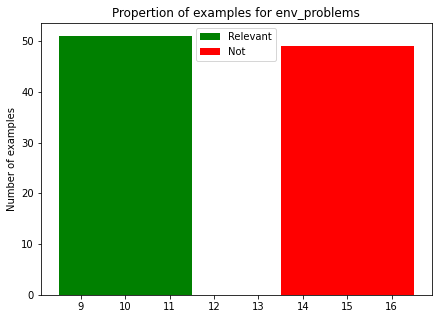

Classification for env_problems:
best parameters:  {'C': 5.263252631578947}
best scores:  0.8
Score of the test prediction - 0.9 





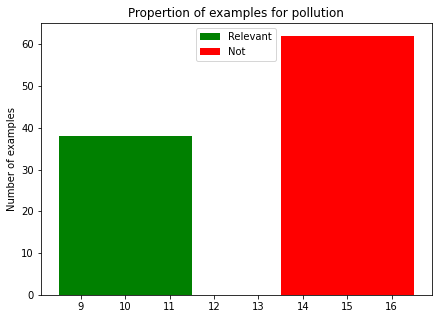

Classification for pollution:
best parameters:  {'C': 5.263252631578947}
best scores:  0.8166666666666668
Score of the test prediction - 0.7 





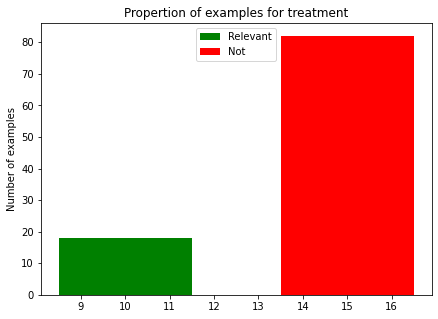

Classification for treatment:
best parameters:  {'C': 0.0001}
best scores:  0.8166666666666668
Score of the test prediction - 0.825 





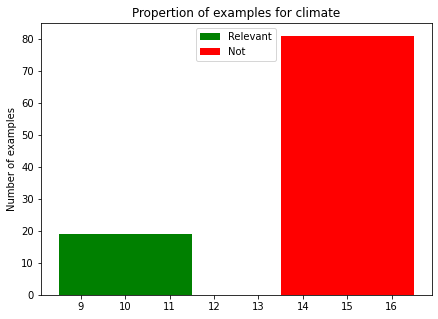

Classification for climate:
best parameters:  {'C': 5.263252631578947}
best scores:  0.9666666666666666
Score of the test prediction - 0.975 





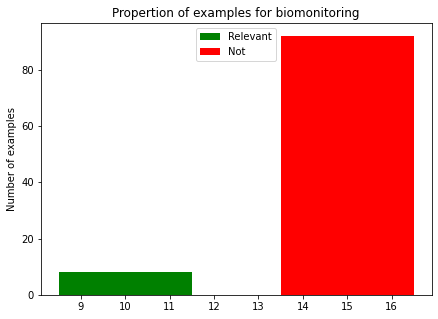

Classification for biomonitoring:
best parameters:  {'C': 0.0001}
best scores:  0.95
Score of the test prediction - 0.875 


Wall time: 14.9 s


In [42]:
%%time
# Solving NLP Classification tasks
print('Solving NLP Classification tasks')
for col in cols:
    target_prediction(df, features, col, test_size=0.4)
    